In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [29]:
# tip data load
data = sns.load_dataset('tips')

In [30]:
# 백분위수 계산(percentile)
print(data['tip'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

print('\n')
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['tip'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64


     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


Text(0, 0.5, '달러($)')

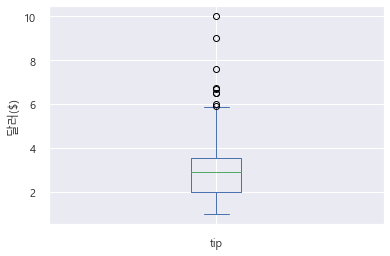

In [31]:
# 한 변수에 대한 이상값 시각화
ax = (data['tip']).plot.box()
ax.set_ylabel('달러($)')

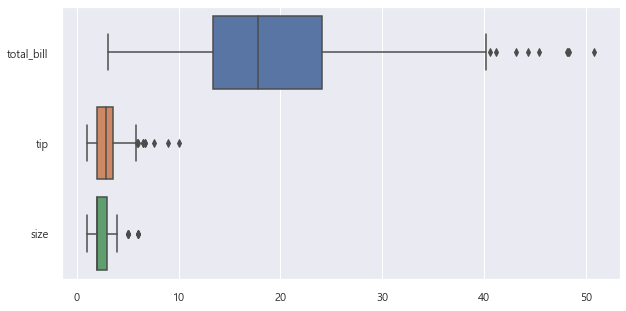

In [32]:
# 상자 그림을 이용한 전체 변수의 이상값 확인
plt.figure(figsize = (10,5))
sns.boxplot(data = data, orient = 'h')
plt.show()

In [33]:
# 막대 그래프
# 요일별 tip 비교
tips_sum_day = data.groupby('day').tip.sum()
tips_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

<BarContainer object of 4 artists>

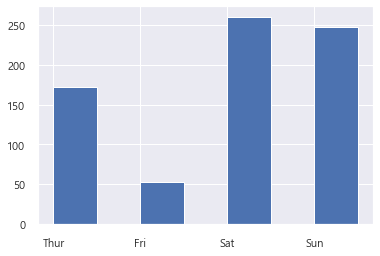

In [34]:
# matplotlib 막대 그래프 시각화
label = ['Thur', 'Fri', 'Sat', 'Sun']
plt.bar(label, tips_sum_day, width = 0.5, align = 'edge')

<AxesSubplot:xlabel='sex', ylabel='tip'>

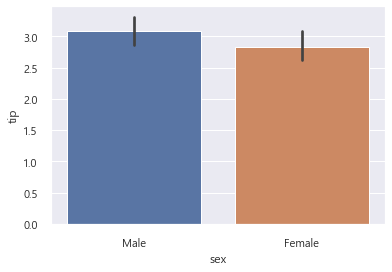

In [35]:
# Seaborn 막대 그래프 시각화
# 성별, 평균 팁 비교
sns.barplot(data = data, x = 'sex', y = 'tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

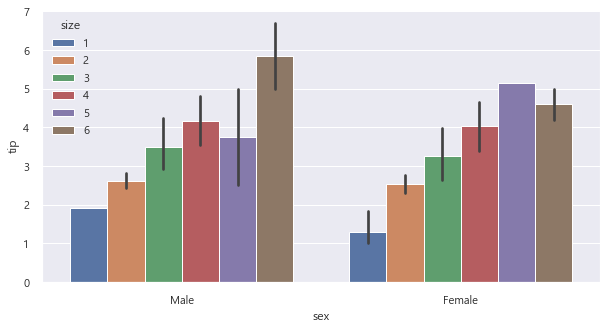

In [36]:
# 식사 인월(size) 별 남성과 여성 팁 평균 비교
## 여러 열에서 집단을 묶어서 세부 집단 시각화 (hue)
plt.figure(figsize = (10,5))
sns.barplot(data=data, x = 'sex', y='tip', hue='size')

In [37]:
# 도수분포표 , 히스토그램
# pd.cut() = 연속된 수치를 구간으로 나누어 카테고리화할 때 사용한다.
# 도수분포표
## 총 계산 금액 구간별 빈도수
bin_total = pd.cut(data['total_bill'], 8) # data를 8개 구간별로 잘라서 구간을 세어준다.
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

Text(0.5, 0, 'total_bill($)')

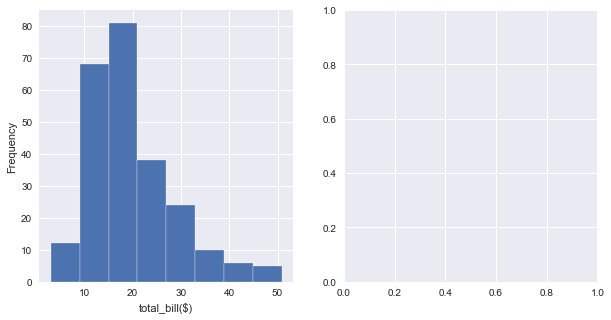

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
# 히스토그램
# plt.style.use('ggplot')
ax1 = plt.subplot(1,2,1)
ax1 = (data['total_bill']) . plot.hist(bins = 8) #bins 구간 수
ax1.set_xlabel('total_bill($)')



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

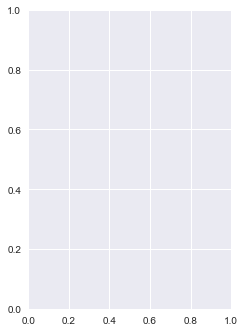

In [50]:
# 밀도 그림
plt.style.use('seaborn')
plt.subplot(1,2,2)
ax2 = data['total_bill']
data['total_bill'].plot.density(ax2);


plt.tight_layout()
plt.show()